dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 f

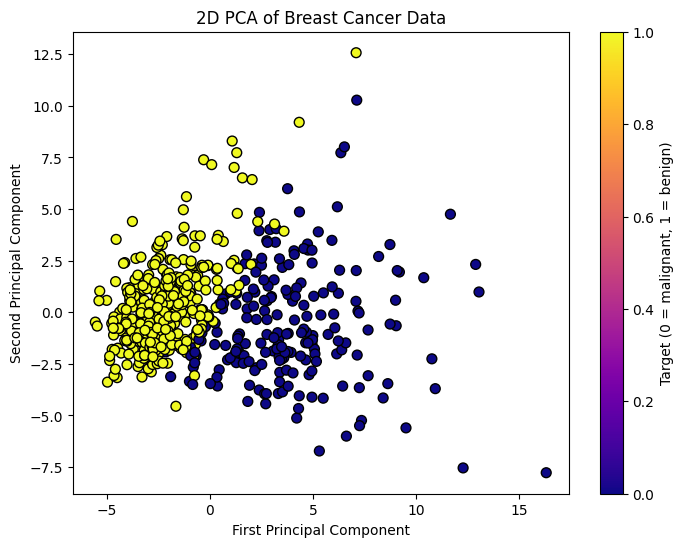

In [12]:
# 🔹 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

%matplotlib inline
# ✅ Why: These are required for data handling (numpy, pandas), visualization (matplotlib, seaborn), 
# and PCA (sklearn).

# 🔹 Step 2: Load the Breast Cancer Dataset

cancer_data = load_breast_cancer()
# ✅ Why: This is a built-in dataset in sklearn containing features of tumors, 
# labeled as malignant or benign.

# 🔹 Step 3: Explore the Dataset

print(cancer_data.keys())
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
# .. _breast_cancer_dataset:
print(cancer_data.DESCR)
# Attribute Information:
#     - radius (mean of distances from center to points on the perimeter)
#     - texture (standard deviation of gray-scale values)
#     - perimeter
#     - area
#     - smoothness (local variation in radius lengths)
#     - compactness (perimeter^2 / area - 1.0)
#     - concavity (severity of concave portions of the contour)
#     - concave points (number of concave portions of the contour)
#     - symmetry
#     - fractal dimension ("coastline approximation" - 1)

# ✅ Why: To understand what the dataset contains (features, target labels, etc.)


# 🔹 Step 4: Convert to DataFrame

df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
df.head()
# | Index | mean radius | mean texture | mean perimeter | mean area | mean smoothness | mean compactness | mean concavity | mean concave points | mean symmetry | mean fractal dim. | ... | worst radius | worst texture | worst perimeter | worst area | worst smoothness | worst compactness | worst concavity | worst concave points | worst symmetry | worst fractal dim. |
# | ----- | ----------- | ------------ | -------------- | --------- | --------------- | ---------------- | -------------- | ------------------- | ------------- | ----------------- | --- | ------------ | ------------- | --------------- | ---------- | ---------------- | ----------------- | --------------- | -------------------- | -------------- | ------------------ |
# | **0** | 17.99       | 10.38        | 122.80         | 1001.0    | 0.1184          | 0.2776           | 0.3001         | 0.1471              | 0.2419        | 0.07871           | ... | 25.38        | 17.33         | 184.60          | 2019.0     | 0.1622           | 0.6656            | 0.7119          | 0.2654               | 0.4601         | 0.11890            |
# | **1** | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.0869         | 0.07017             | 0.1812        | 0.05667           | ... | 24.99        | 23.41         | 158.80          | 1956.0     | 0.1238           | 0.1866            | 0.2416          | 0.1860               | 0.2750         | 0.08902            |
# | **2** | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.1974         | 0.12790             | 0.2069        | 0.05999           | ... | 23.57        | 25.53         | 152.50          | 1709.0     | 0.1444           | 0.4245            | 0.4504          | 0.2430               | 0.3613         | 0.08758            |
# | **3** | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.2414         | 0.10520             | 0.2597        | 0.09744           | ... | 14.91        | 26.50         | 98.87           | 567.7      | 0.2098           | 0.8663            | 0.6869          | 0.2575               | 0.6638         | 0.17300            |
# | **4** | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.1980         | 0.10430             | 0.1809        | 0.05883           | ... | 22.54        | 16.67         | 152.20          | 1575.0     | 0.1374           | 0.2050            | 0.4000          | 0.1625               | 0.2364         | 0.07678            |
# ✅ Why: Makes it easier to work with the data and view features.

# 🔹 Step 5: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# ✅ Why: PCA works best when data is scaled (mean = 0, standard deviation = 1).
# This avoids features with large values dominating the variance.
# All features contribute equally to the PCA that is why we standardized.

# 🔹 Step 6: Apply PCA (Reduce to 2 Features)

# we want 2 feature out of all feature which cover maximum variance
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
data_pca 
# array([[ 9.19283683,  1.94858307]])
# Here we extract two feature
# ✅ Why: We reduce all original features to just 2 new features (principal components) that still capture most of the variance (information) in the data.

# 🔹 Step 7: Check Explained Variance

print("variance of each component", pca.explained_variance_ratio_)
# [0.44272026 0.18971182]
# ➡️ PC1 captures ~44%
# ➡️ PC2 captures ~19%
# 🟰 Total: ~63% of the original data’s information
# ✅ Why: Tells how much variance (information) is captured by each principal component.

# 🔹 Step 8: Visualize the Data in 2D

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], 
            c=cancer_data.target, cmap='plasma', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA of Breast Cancer Data')
plt.colorbar(label='Target (0 = malignant, 1 = benign)')
plt.show()

